In [1]:
library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.59)


In [58]:
data(foxes)

head(foxes)

group,avgfood,groupsize,area,weight
1,0.37,2,1.09,5.02
1,0.37,2,1.09,2.84
2,0.53,2,2.05,5.33
2,0.53,2,2.05,6.07
3,0.49,2,2.12,5.85
3,0.49,2,2.12,3.25


In [59]:
dim(f)

[1] 116   5

In [60]:
m5H1.1 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b1*area ,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = foxes
)

In [65]:
m5H1.2 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a2 + b2*groupsize ,
    a2 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = foxes
)

[ 1000 / 1000 ]


Warning message in abline(m5H1.1):
“only using the first two of 3 regression coefficients”

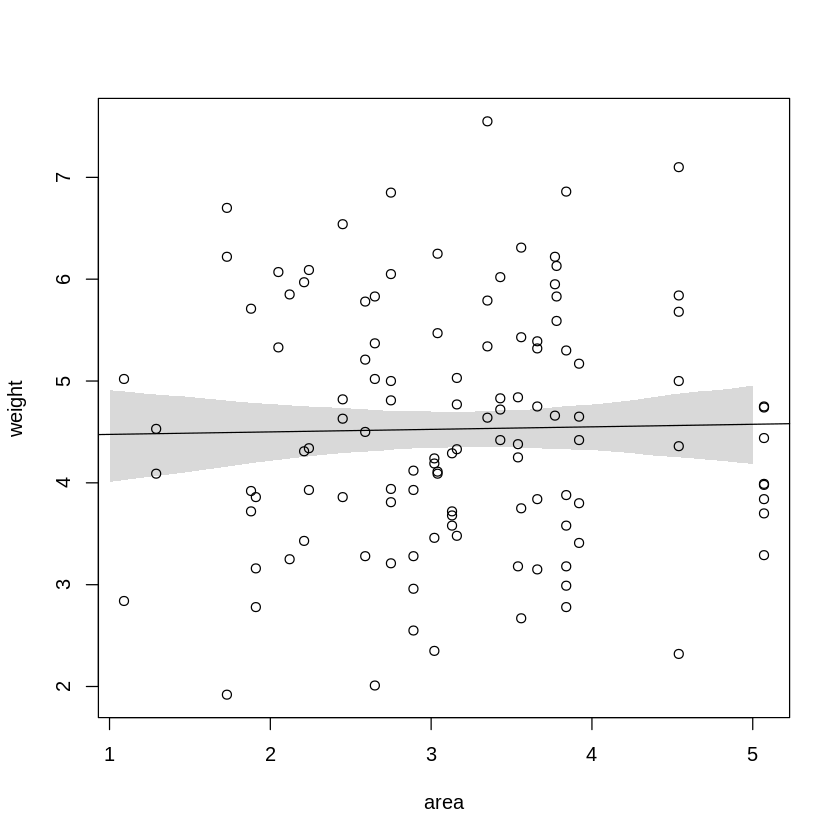

In [66]:
m5h11.seq <- seq(from = 1, to = 5, length.out = 50)
mu <- link(m5H1.1, data = data.frame(area = m5h11.seq))
mu.PI <- apply(mu, 2, PI)

plot(weight ~ area, data = foxes)
abline(m5H1.1)
shade(mu.PI, m5h11.seq)


[ 1000 / 1000 ]


Warning message in abline(m5H1.2):
“only using the first two of 3 regression coefficients”

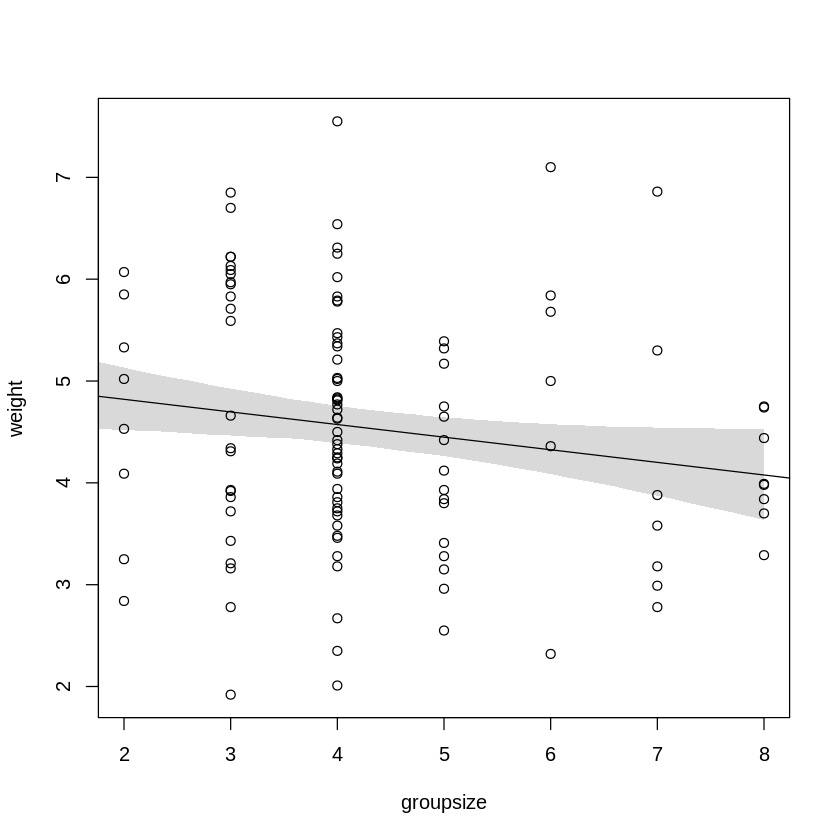

In [67]:
m5h12.seq <- seq(from = 1, to = 8, length.out = 50)
mu <- link(m5H1.2, data = data.frame(groupsize = m5h12.seq))
mu.PI <- apply(mu, 2, PI)

plot(weight ~ groupsize, data = foxes)
abline(m5H1.2)
shade(mu.PI, m5h12.seq)


In [69]:
m5h2 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b_a*area + b_gs* groupsize,
    a ~ dnorm(5,10),
    b_a ~ dnorm(0,1),
    b_gs ~ dnorm(0,1),
    sigma ~ dnorm(0,1)
  ),
  data = foxes
)

[ 1000 / 1000 ]
[ 10000 / 10000 ]


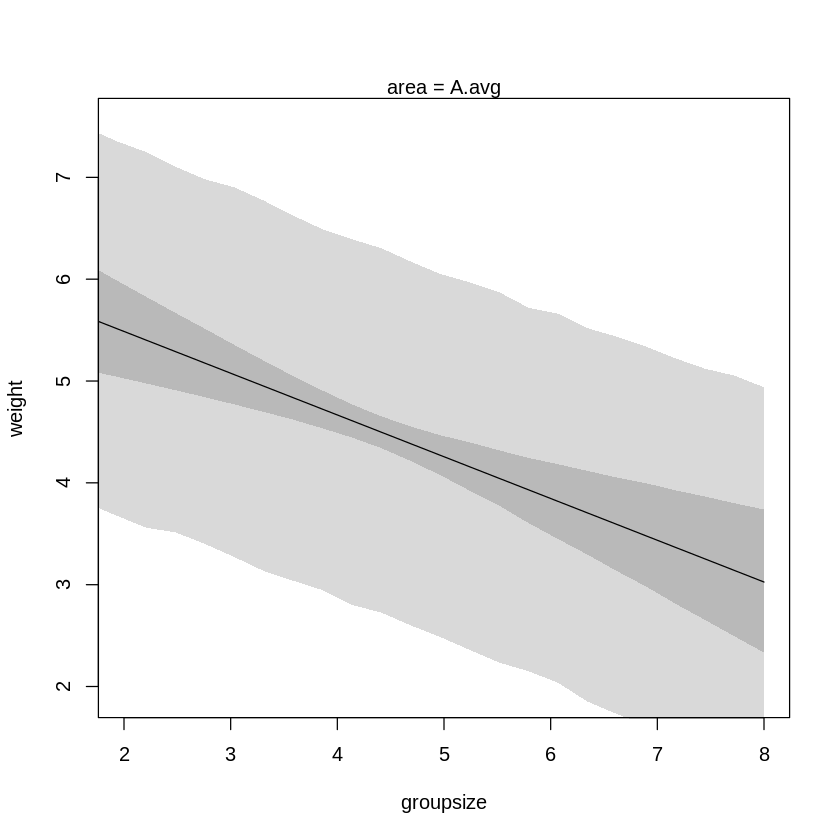

In [70]:
A.avg <- mean(foxes$area)
R.seq <- seq(from = 0, to = 8, length.out = 30)
pred.data <- data.frame(groupsize = R.seq, area = A.avg )

mu <- link(m5h2, data = pred.data)
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

R.sim <- sim(m5h2, data = pred.data, n = 1e4)

R.PI <- apply(R.sim, 2, PI)

plot(weight ~ groupsize, data = foxes, type = "n")

lines(R.seq, mu.mean)
mtext("area = A.avg")

shade(mu.PI, R.seq)
shade(R.PI, R.seq)

[ 1000 / 1000 ]
[ 10000 / 10000 ]


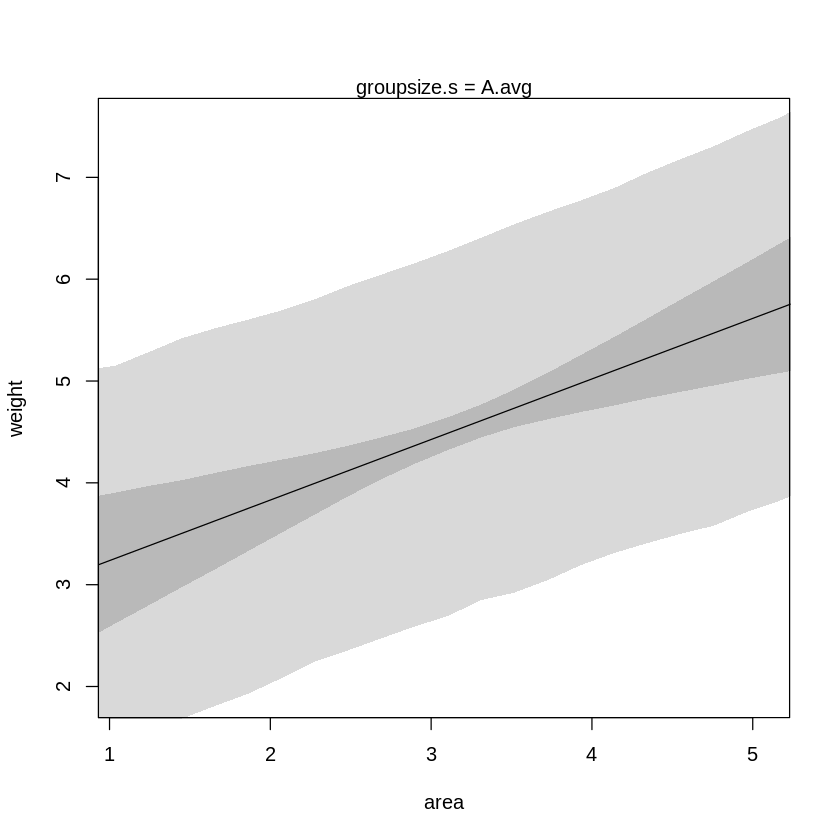

In [72]:
A.avg <- mean(foxes$groupsize)
R.seq <- seq(from = 0, to = 6, length.out = 30)
pred.data <- data.frame(area = R.seq, groupsize = A.avg )

mu <- link(m5h2, data = pred.data)
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

R.sim <- sim(m5h2, data = pred.data, n = 1e4)

R.PI <- apply(R.sim, 2, PI)

plot(weight ~ area, data = foxes, type = "n")

lines(R.seq, mu.mean)
mtext("groupsize.s = A.avg")


shade(mu.PI, R.seq)
shade(R.PI, R.seq)

In [73]:
m5h3.1 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b_gs * groupsize + b_f * avgfood,
    a ~ dnorm(5,10),
    b_f ~ dnorm(0,1),
    b_gs ~ dnorm(0,1),
    sigma ~ dnorm(0,10)
  ),
  data = foxes
)

In [76]:
m5h3.2 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b_a * area + b_gs * groupsize + b_f * avgfood,
    a ~ dnorm(5,10),
    b_a ~ dnorm(0,1),
    b_f ~ dnorm(0,1),
    b_gs ~ dnorm(0,1),
    sigma ~ dnorm(0,10)
  ),
  data = foxes
)

In [77]:
m5h3.3 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b_a * area + b_f * avgfood,
    a ~ dnorm(5,10),
    b_a ~ dnorm(0,1),
    b_f ~ dnorm(0,1),
    sigma ~ dnorm(0,10)
  ),
  data = foxes
)

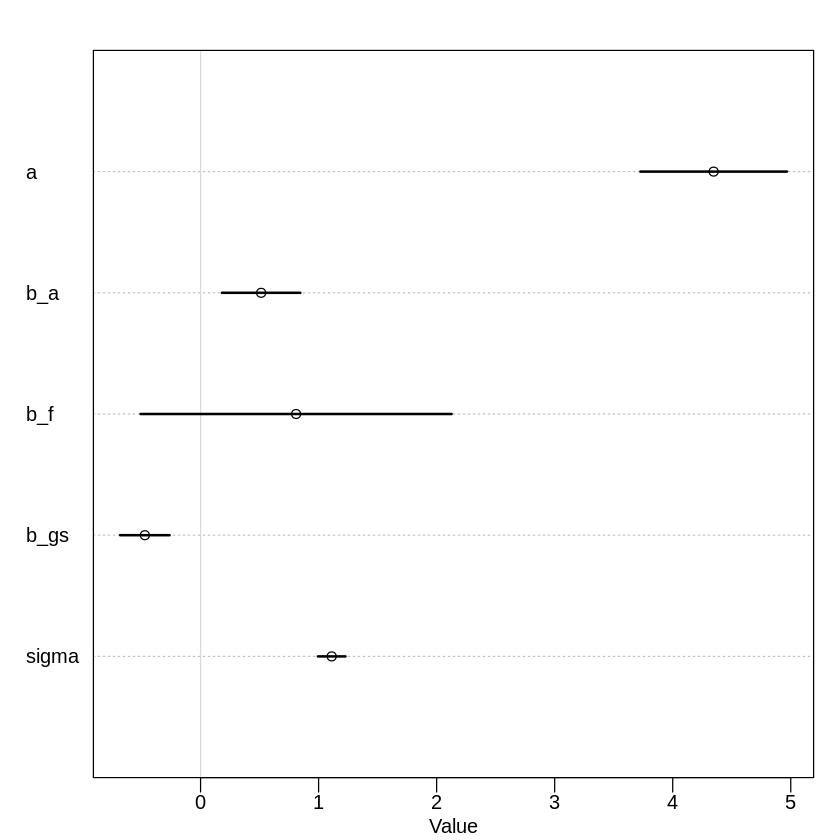

In [78]:
plot(precis(m5h3.2))

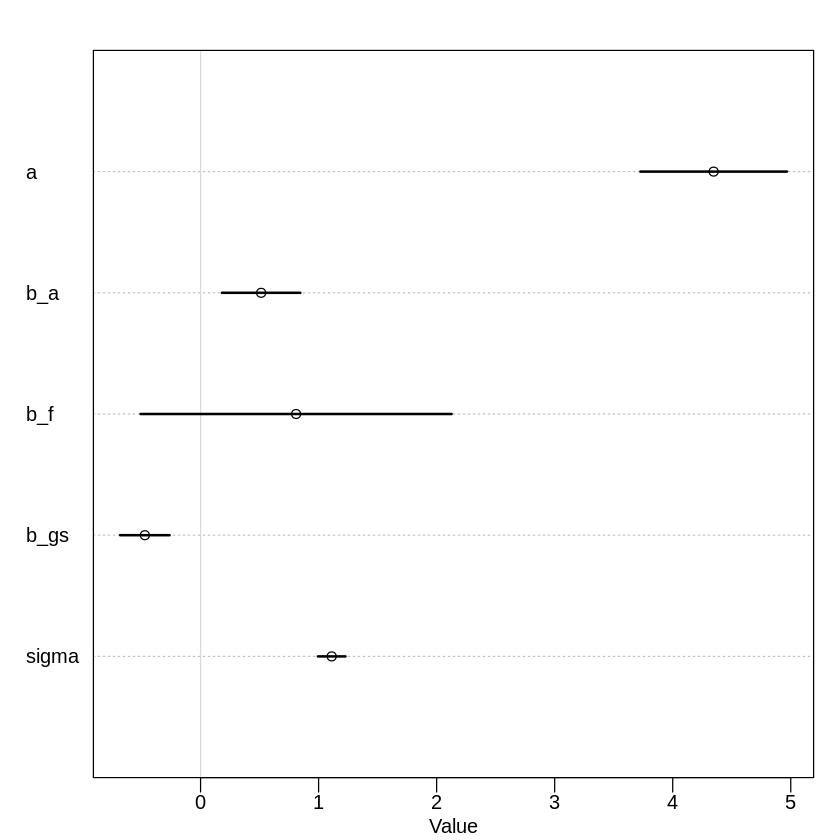

In [79]:
plot(precis(m5h3.2))

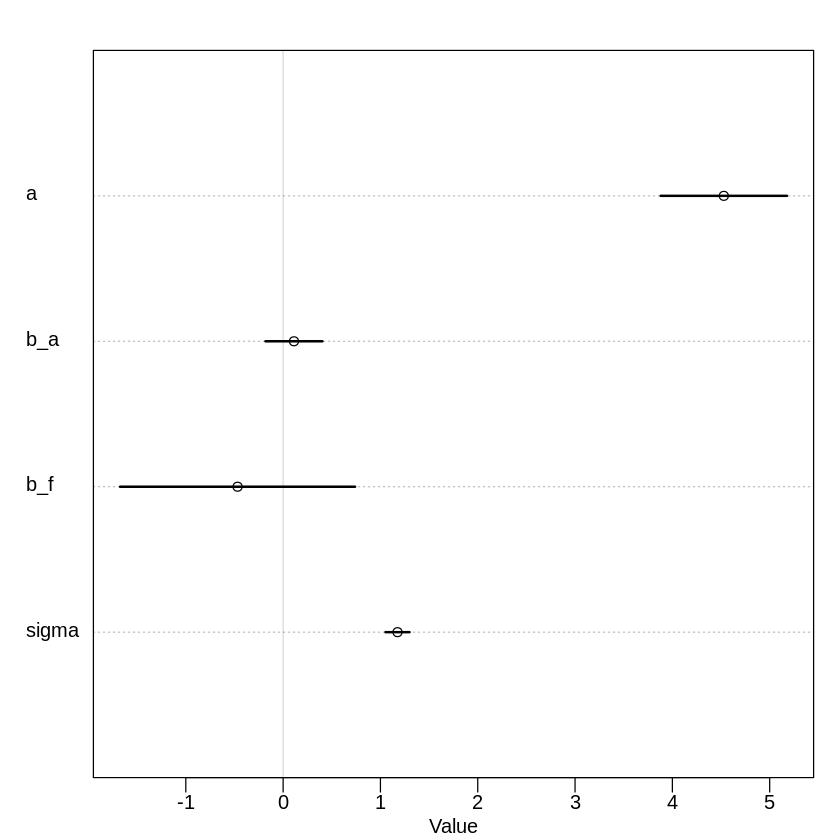

In [51]:
plot(precis(m5h3.3))

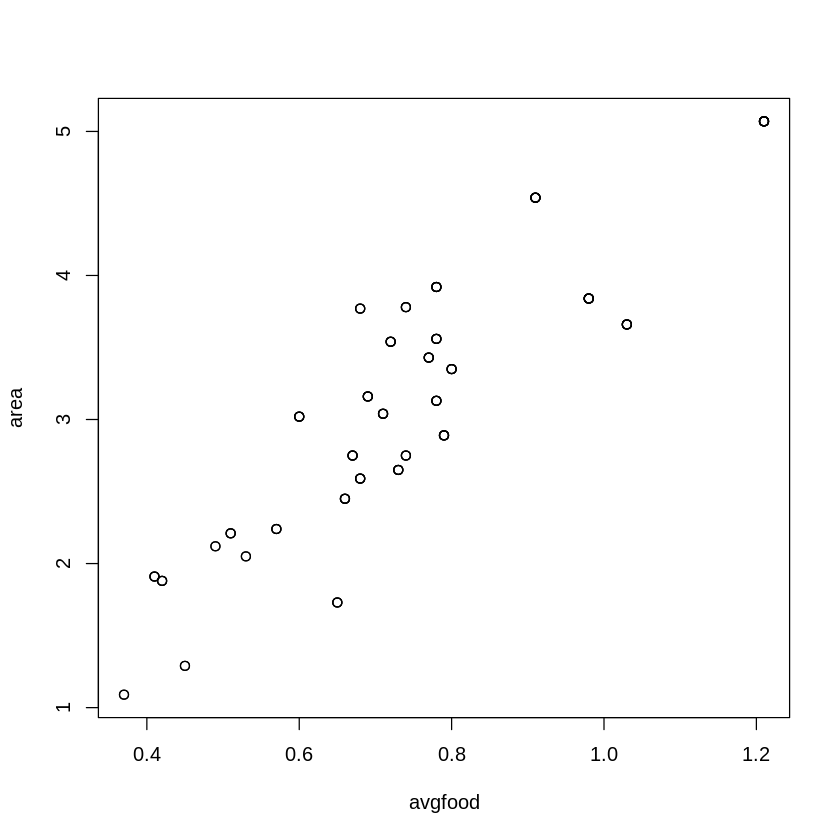

In [80]:
plot(area ~ avgfood, data = foxes)

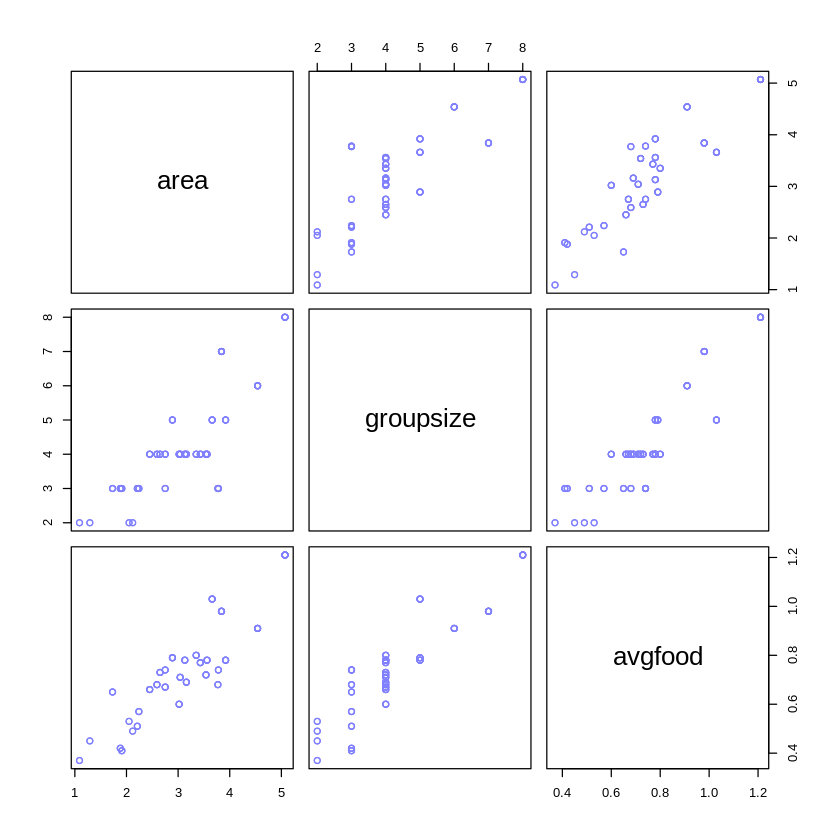

In [81]:
pairs(~ area + groupsize + avgfood, data = foxes, col = rangi2)

In [82]:
cor(foxes$area, foxes$groupsize)

[1] 0.8275945

In [83]:
cor(foxes$area, foxes$avgfood)

[1] 0.8831038

In [84]:
cor(foxes$groupsize, foxes$avgfood)

[1] 0.9014829